This notebook contains the exploratory 4-topic LDA using raw frequency count.

In [81]:
import pandas as pd
import gensim
import pickle
from gensim.models import CoherenceModel

n_topics = 10

with open('dictionary_r.pkl', 'rb') as fp:
    dictionary_r = pickle.load(fp)
dictionary_r.filter_extremes(no_below=10, no_above=0.5)
    
with open('corpus_r.pkl', 'rb') as fp:
    corpus_r = pickle.load(fp)

#senlda_r = gensim.models.ldamodel.LdaModel(corpus=corpus_r, id2word=dictionary_r, num_topics=n_topics, alpha='auto', eta='auto')

#senlda_r.save('Models/Model_20')

In [86]:
dictionary_r.keys() ==  list(range(6429))

True

In [19]:
corpus_r[0]

[(2, 1),
 (16, 4),
 (17, 1),
 (25, 15),
 (28, 9),
 (31, 1),
 (32, 2),
 (34, 1),
 (38, 1),
 (42, 1),
 (50, 1),
 (52, 1),
 (53, 2),
 (65, 1),
 (66, 3),
 (67, 1),
 (69, 1),
 (70, 11),
 (80, 2),
 (83, 4),
 (84, 1),
 (86, 1),
 (93, 2),
 (101, 3),
 (106, 7),
 (107, 2),
 (114, 4),
 (115, 4),
 (120, 1),
 (121, 6),
 (126, 2),
 (145, 2),
 (153, 8),
 (157, 1),
 (166, 1),
 (168, 1),
 (171, 1),
 (173, 1),
 (181, 1),
 (183, 1),
 (185, 2),
 (192, 1),
 (200, 4),
 (204, 1),
 (211, 2),
 (224, 3),
 (228, 1),
 (233, 4),
 (234, 5),
 (238, 4),
 (239, 2),
 (253, 1),
 (260, 3),
 (265, 1),
 (281, 1),
 (285, 1),
 (292, 2),
 (294, 7),
 (297, 1),
 (304, 1),
 (312, 1),
 (313, 1),
 (322, 3),
 (327, 6),
 (332, 1),
 (339, 1),
 (340, 5),
 (345, 3),
 (346, 3),
 (350, 2),
 (352, 1),
 (354, 1),
 (370, 1),
 (371, 1),
 (384, 1),
 (388, 8),
 (389, 1),
 (392, 2),
 (394, 2),
 (395, 1),
 (409, 3),
 (417, 1),
 (426, 1),
 (432, 1),
 (433, 1),
 (440, 1),
 (443, 8),
 (465, 2),
 (467, 2),
 (469, 1),
 (472, 1),
 (480, 2),
 (484, 1),

In [20]:
corpus_r[1]

[(2, 2),
 (16, 4),
 (17, 1),
 (22, 1),
 (25, 16),
 (28, 3),
 (31, 4),
 (32, 2),
 (34, 1),
 (50, 1),
 (52, 1),
 (53, 1),
 (63, 1),
 (65, 1),
 (66, 1),
 (69, 2),
 (70, 7),
 (80, 2),
 (83, 4),
 (84, 4),
 (93, 2),
 (106, 3),
 (110, 2),
 (111, 1),
 (114, 3),
 (115, 3),
 (120, 1),
 (121, 3),
 (126, 1),
 (132, 1),
 (145, 2),
 (153, 4),
 (155, 1),
 (157, 1),
 (158, 1),
 (166, 1),
 (171, 1),
 (178, 1),
 (180, 1),
 (181, 2),
 (182, 1),
 (185, 1),
 (192, 1),
 (195, 3),
 (199, 1),
 (200, 1),
 (204, 1),
 (224, 2),
 (228, 1),
 (233, 1),
 (239, 2),
 (241, 1),
 (253, 2),
 (260, 3),
 (264, 1),
 (265, 1),
 (281, 1),
 (292, 2),
 (294, 3),
 (297, 1),
 (304, 1),
 (313, 1),
 (327, 3),
 (332, 2),
 (336, 2),
 (338, 1),
 (339, 1),
 (340, 2),
 (346, 1),
 (348, 2),
 (350, 2),
 (352, 1),
 (362, 1),
 (370, 1),
 (380, 2),
 (384, 1),
 (388, 7),
 (389, 2),
 (395, 1),
 (413, 2),
 (423, 2),
 (426, 1),
 (432, 1),
 (438, 3),
 (439, 1),
 (440, 2),
 (443, 2),
 (450, 1),
 (452, 1),
 (455, 3),
 (465, 2),
 (467, 1),
 (469, 1)

In [4]:
with open('../indus_wanted.pkl', 'rb') as fp:
    indus_wanted = pickle.load(fp)


In [6]:
corpus_wanted = [corpus_r[i] for i in indus_wanted.index]

,gvkey,FDATE,permno,ma_ret,RET,vwret,FName,gind,wanted1,wanted2,wanted3,wanted4,category
7,11903,20100114,10025,-0.030430,0.023926,0.0024,0001193125-10-006494.txt,151030.0,False,True,False,False,material
8,11903,20110114,10025,0.066290,0.066775,0.0069,0001193125-11-008295.txt,151030.0,False,True,False,False,material
9,11903,20120117,10025,0.034458,0.029080,0.0036,0001193125-12-013914.txt,151030.0,False,True,False,False,material
10,11903,20130122,10025,-0.004012,0.000162,0.0048,0001193125-13-019043.txt,151030.0,False,True,False,False,material
11,11903,20140114,10025,0.012214,0.035475,0.0115,0001193125-14-010742.txt,151030.0,False,True,False,False,material
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,66228,20100728,93398,-0.110737,0.001770,-0.0082,0000943440-10-000447.txt,101020.0,True,False,False,False,energy
37716,66228,20110729,93398,-0.426273,-0.183333,-0.0056,0000943440-11-000404.txt,101020.0,True,False,False,False,energy
37717,66228,20120716,93398,-0.122059,-0.054348,-0.0031,0000785968-12-000030.txt,101020.0,True,False,False,False,energy
37718,66228,20130715,93398,-0.003624,-0.007389,0.0020,0000785968-13-000065.txt,101020.0,True,False,False,False,energy


In [3]:
type(dictionary_r)

gensim.corpora.dictionary.Dictionary

In [4]:
type(corpus_r)

list

In [22]:
len(dictionary_r.keys())

6429

In [26]:
dictionary_r[25]

'annualized'

In [83]:
len(dictionary_r)

6429

In [5]:
corpus_wanted = [corpus_r[i] for i in indus_wanted.index]

In [84]:
len(corpus_wanted)

16411

### sifting through high IDF tokens

In [90]:
doc_freq ={ }

for cor in corpus_wanted:
    
    for tup in cor:
        
        if tup[0] not in doc_freq:
            doc_freq[tup[0]] =1
        else:
            doc_freq[tup[0]] +=1

In [141]:
import math


In [94]:
for k,v in doc_freq.items():

        doc_freq[k] = math.log(16411/v)

In [140]:
max(doc_freq.values())

9.705707120679628

In [139]:
min(doc_freq.values())

0.32292719176394113

In [98]:
sum(doc_freq.values())/ len(doc_freq.values())

2.4274272934969163

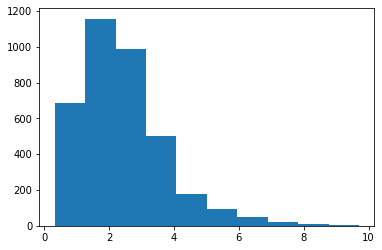

In [96]:
x = list(doc_freq.values())
n, bins, patches = plt.hist(x)
plt.show()

In [142]:
with open('idfs.pickle', 'wb') as handle:
    pickle.dump(doc_freq, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [128]:
# getting the unusual words into wanted_words 
wanted_words = []
for k,v in doc_freq.items():
    
    if v >= 4:
        wanted_words.append(k)
        
        
        

In [129]:
len(wanted_words)

395

In [130]:
a = [1,2,3,4,5,6,7,8,9,10]
for n in a:
    if n%2 !=0:
        a.remove(n)
a      

[2, 4, 6, 8, 10]

In [131]:
# modify corpus_wanted to only contain bag of wanted words
for cor in corpus_wanted:
    for tup in cor:
        if tup[0] not in wanted_words:
            cor.remove(tup)         

In [132]:
corpus_wanted[0]

[(43, 1),
 (65, 1),
 (114, 1),
 (139, 2),
 (154, 1),
 (185, 2),
 (211, 1),
 (238, 1),
 (264, 2),
 (286, 1),
 (319, 1),
 (368, 1),
 (400, 1),
 (424, 2),
 (468, 2),
 (494, 3),
 (517, 1),
 (540, 2),
 (550, 3),
 (590, 1),
 (629, 1),
 (666, 1),
 (687, 1),
 (722, 2),
 (735, 1),
 (777, 1),
 (802, 1),
 (834, 2),
 (860, 1),
 (912, 1),
 (956, 3),
 (977, 3),
 (1031, 1),
 (1085, 1),
 (1115, 1),
 (1164, 2),
 (1189, 4),
 (1254, 1),
 (1284, 2),
 (1321, 1),
 (1372, 1),
 (1386, 1),
 (1430, 1),
 (1481, 1),
 (1540, 3),
 (1560, 1),
 (1620, 1),
 (1689, 5),
 (1743, 1),
 (1772, 1),
 (1825, 1),
 (1855, 2),
 (1879, 1),
 (1941, 2),
 (1983, 1),
 (2021, 1),
 (2132, 2),
 (2177, 1),
 (2262, 1),
 (2377, 1),
 (2434, 1),
 (2527, 1),
 (2567, 1),
 (2605, 1),
 (2720, 1),
 (2770, 2),
 (2889, 3),
 (3008, 1),
 (3041, 1),
 (3228, 2),
 (3327, 1),
 (3463, 1),
 (3606, 1)]

In [133]:
senlda_r_idf = gensim.models.ldamodel.LdaModel(corpus=corpus_wanted, id2word=dictionary_r, num_topics=4, alpha='auto', eta='auto')

In [134]:
senlda_r_idf.show_topic(0, topn=20)

[('computation', 0.02190379),
 ('objective', 0.021412581),
 ('departments', 0.018232841),
 ('contribute', 0.017287394),
 ('deliver', 0.011918148),
 ('contained', 0.0102646025),
 ('recruitment', 0.008746426),
 ('consolidation', 0.007255503),
 ('leader', 0.006149025),
 ('advisor', 0.005891894),
 ('properly', 0.005725441),
 ('utilizing', 0.0054086484),
 ('marine', 0.0052503515),
 ('tools', 0.005090891),
 ('seasonal', 0.004762646),
 ('warehouse', 0.004640217),
 ('mandatory', 0.0046269507),
 ('accomplished', 0.004496038),
 ('lack', 0.0044907485),
 ('procedures', 0.0044241343)]

In [135]:
senlda_r_idf.show_topic(1, topn=20)

[('needed', 0.035252184),
 ('dispositions', 0.029418),
 ('company\x92s', 0.017457094),
 ('®', 0.010807658),
 ('approved', 0.010040167),
 ('utilized', 0.009069242),
 ('engagement', 0.008399453),
 ('construct', 0.008339925),
 ('approve', 0.008316237),
 ('additions', 0.008011583),
 ('updating', 0.007803654),
 ('reportable', 0.007775099),
 ('vendor', 0.006877607),
 ('transportation', 0.006611623),
 ('md&a', 0.005171756),
 ('voting', 0.00516385),
 ('refinancing', 0.0051634307),
 ('usually', 0.0051613017),
 ('properly', 0.0051398333),
 ('preliminary', 0.0049540885)]

In [136]:
senlda_r_idf.show_topic(2, topn=20)

[('properly', 0.00661047),
 ('controlling', 0.005965442),
 ('requiring', 0.005480173),
 ('servicing', 0.004813499),
 ('replaces', 0.0042734733),
 ('contribute', 0.0040119584),
 ('forfeiture', 0.0039814967),
 ('applies', 0.003945477),
 ('step', 0.0038215097),
 ('gallons', 0.003486822),
 ('annualized', 0.003117795),
 ('adequate', 0.0029599639),
 ('versus', 0.0028898418),
 ('indicators', 0.0028681757),
 ('commonly', 0.0027543502),
 ('debts', 0.0027012907),
 ('system', 0.0024817463),
 ('backlog', 0.0024540988),
 ('reversed', 0.0022913155),
 ('models', 0.0021759467)]

In [137]:
senlda_r_idf.show_topic(3, topn=20)

[('capitalize', 0.024062607),
 ('crude', 0.016660035),
 ('series', 0.015591918),
 ('processing', 0.010576676),
 ('mineral', 0.009665055),
 ('exploratory', 0.008838954),
 ('exploitation', 0.008581816),
 ('affiliate', 0.0072132107),
 ('modernization', 0.0065456023),
 ('whichever', 0.0065004774),
 ('homogenous', 0.0062160385),
 ('capture', 0.0052490644),
 ('characteristics', 0.0049693035),
 ('personnel', 0.004952578),
 ('semi', 0.0047320407),
 ('horizontal', 0.0046581426),
 ('suspension', 0.0045710118),
 ('sustainable', 0.0044094906),
 ('satisfies', 0.00433744),
 ('properly', 0.004310035)]

In [138]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(senlda_r_idf, corpus_wanted, dictionary_r)
#pyLDAvis.save_html(vis, 'topic_model——2.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.022279 -0.018616       1        1  34.430134
0      0.141017 -0.081886       2        1  29.927250
3     -0.169033 -0.027711       3        1  19.223724
1      0.050294  0.128213       4        1  16.418892, topic_info=              Term          Freq         Total Category  logprob  loglift
1157        needed  23833.000000  23833.000000  Default  30.0000  30.0000
1075  dispositions  21769.000000  21769.000000  Default  29.0000  29.0000
1032    capitalize  18762.000000  18762.000000  Default  28.0000  28.0000
789      objective  26552.000000  26552.000000  Default  27.0000  27.0000
1363   computation  28860.000000  28860.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
409     reportable   5154.846840  12316.461589   Topic4  -4.8568   0.9357
1425      forwards   3056.592469   5936.273813   Topic4  -5.3795   1.1430
348         points   2576.069944   5169.562242   Topic4  -5.5505   1.1102
1021          amex   2583.161491   5484.686542   Topic4  -5.5478   1.0538
979       properly   3407.680528  22862.790437   Topic4  -5.2707  -0.0967

[260 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1001      1  0.010721     absence
1001      2  0.000487     absence
1001      3  0.973190     absence
1001      4  0.015594     absence
2485      1  0.007002  accessible
...     ...       ...         ...
1613      4  0.007152        u.s
1841      1  0.008272           ®
1841      2  0.043591           ®
1841      3  0.007353           ®
1841      4  0.940742           ®

[883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [79]:
senlda_r.show_topic(0, topn=20)

[('series', 0.013582914),
 ('properly', 0.00829551),
 ('replaces', 0.0067740493),
 ('requiring', 0.006490694),
 ('servicing', 0.0062919194),
 ('applies', 0.005572938),
 ('needed', 0.004823982),
 ('step', 0.0044630747),
 ('indicators', 0.004281036),
 ('living', 0.003458349),
 ('forfeiture', 0.0034278776),
 ('partners', 0.003206625),
 ('adequate', 0.0031764286),
 ('behavior', 0.0029734487),
 ('debts', 0.0029607746),
 ('gps', 0.0029556572),
 ('backlog', 0.002938645),
 ('gallons', 0.0028531477),
 ('system', 0.0028203833),
 ('models', 0.0028200143)]

In [12]:
senlda_r.show_topic(1, topn=20)

[('series', 0.0130387135),
 ('properly', 0.0074852663),
 ('replaces', 0.0065403976),
 ('requiring', 0.0060337456),
 ('servicing', 0.0058486136),
 ('applies', 0.005397743),
 ('indicators', 0.004574497),
 ('step', 0.00441531),
 ('forfeiture', 0.0034199576),
 ('adequate', 0.0031491593),
 ('organizations', 0.0031410344),
 ('debts', 0.0031312671),
 ('partners', 0.0030719934),
 ('backlog', 0.0029811),
 ('annualized', 0.0029777628),
 ('gps', 0.0028823926),
 ('salary', 0.0028489458),
 ('gallons', 0.002813833),
 ('system', 0.0027554845),
 ('behavior', 0.0027242033)]

In [13]:
senlda_r.show_topic(2, topn=20)

[('needed', 0.016855244),
 ('computation', 0.010862677),
 ('properly', 0.009782876),
 ('living', 0.0074399584),
 ('assessed', 0.005133222),
 ('engagement', 0.0050645904),
 ('closely', 0.004873292),
 ('multimedia', 0.004836243),
 ('points', 0.0048341914),
 ('transportation', 0.0045596776),
 ('company\x92s', 0.0044869483),
 ('extinguishment', 0.0043608192),
 ('forfeiture', 0.004299719),
 ('condensed', 0.0040322966),
 ('gallons', 0.0038157569),
 ('commissions', 0.0037414476),
 ('difficult', 0.003562065),
 ('work', 0.0030892848),
 ('qualifications', 0.003060962),
 ('firm', 0.0029274477)]

In [14]:
senlda_r.show_topic(3, topn=20)

[('capitalize', 0.03601824),
 ('dispositions', 0.030962665),
 ('crude', 0.024050504),
 ('exploitation', 0.01467626),
 ('accurate', 0.010570867),
 ('mineral', 0.008067446),
 ('affiliate', 0.0076313084),
 ('satisfies', 0.0072754794),
 ('modernization', 0.006726454),
 ('properly', 0.006684997),
 ('suspension', 0.006365304),
 ('workforce', 0.0063280906),
 ('premium', 0.00575381),
 ('exploratory', 0.0057197823),
 ('needed', 0.004914197),
 ('element', 0.004629984),
 ('considerable', 0.0044786544),
 ('gallons', 0.0043318346),
 ('topic', 0.004210081),
 ('leasing', 0.0041494644)]

In [15]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(senlda_r, corpus_wanted, dictionary_r)
#pyLDAvis.save_html(vis, 'topic_model——2.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.143467 -0.049203       1        1  36.205016
1     -0.038434  0.097647       2        1  25.699478
2      0.017936  0.034455       3        1  20.074478
3     -0.122969 -0.082898       4        1  18.021027, topic_info=              Term           Freq          Total Category  logprob  loglift
1032    capitalize  189885.000000  189885.000000  Default  30.0000  30.0000
1075  dispositions  163139.000000  163139.000000  Default  29.0000  29.0000
1062         crude  128208.000000  128208.000000  Default  28.0000  28.0000
621     contribute  205414.000000  205414.000000  Default  27.0000  27.0000
1953   departments  185614.000000  185614.000000  Default  26.0000  26.0000
...            ...            ...            ...      ...      ...      ...
1460        living   19613.119524   98751.753869   Topic4  -5.5810   0.0972
636          debts   17172.195613   57537.735715   Topic4  -5.7139   0.5045
1546         sense   16816.700505   50315.331850   Topic4  -5.7348   0.6177
713     guarantees   15243.983499   27195.655610   Topic4  -5.8330   1.1348
409     reportable   16471.078242   91301.697065   Topic4  -5.7556   0.0011

[319 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1001      1  0.000904     absence
1001      2  0.023943     absence
1001      3  0.000904     absence
1001      4  0.974137     absence
2485      1  0.984936  accessible
...     ...       ...         ...
1610      4  0.017627        net
1841      1  0.852154           ®
1841      2  0.019133           ®
1841      3  0.095604           ®
1841      4  0.033115           ®

[1057 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [16]:
pyLDAvis.save_html(vis, 'topic_model——4selected.html')

In [8]:
len(corpus_r)

37720

In [11]:
senlda_r.get_document_topics(corpus_wanted[0])

[(0, 0.5587273), (2, 0.018328061), (3, 0.4228708)]

In [10]:
senlda_r.get_document_topics(corpus_wanted[1], minimum_probability=None, minimum_phi_value=None, per_word_topics=False)

[(0, 0.65828514), (3, 0.34153017)]

In [14]:
import pandas as pd
ldaDF = pd.DataFrame({
        'id' : list(range(len(corpus_wanted))),
        'topics' : [senlda_r.get_document_topics(bow) for bow in corpus_wanted]
    })




In [15]:
ldaDF

,id,topics
0,0,"[(0, 0.55870324), (2, 0.018381346), (3, 0.4228..."
1,1,"[(0, 0.6583199), (3, 0.3414954)]"
2,2,"[(0, 0.5357907), (1, 0.057703342), (3, 0.40640..."
3,3,"[(0, 0.5721986), (1, 0.08534334), (3, 0.335168..."
4,4,"[(0, 0.6279815), (1, 0.08194361), (3, 0.2899645)]"
...,...,...
16406,16406,"[(0, 0.05717229), (2, 0.51586735), (3, 0.42689..."
16407,16407,"[(0, 0.08697668), (2, 0.48671415), (3, 0.42624..."
16408,16408,"[(0, 0.16100323), (2, 0.7787835), (3, 0.060147..."
16409,16409,"[(0, 0.08769204), (2, 0.67033815), (3, 0.24191..."


In [17]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(4)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(4):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF

,id,topics,topic_0,topic_1,topic_2,topic_3
0,0,"[(0, 0.55870324), (2, 0.018381346), (3, 0.4228...",0.558703,0.000000,0.018381,0.422842
1,1,"[(0, 0.6583199), (3, 0.3414954)]",0.658320,0.000000,0.000000,0.341495
2,2,"[(0, 0.5357907), (1, 0.057703342), (3, 0.40640...",0.535791,0.057703,0.000000,0.406401
3,3,"[(0, 0.5721986), (1, 0.08534334), (3, 0.335168...",0.572199,0.085343,0.000000,0.335169
4,4,"[(0, 0.6279815), (1, 0.08194361), (3, 0.2899645)]",0.627981,0.081944,0.000000,0.289964
...,...,...,...,...,...,...
16406,16406,"[(0, 0.05717229), (2, 0.51586735), (3, 0.42689...",0.057172,0.000000,0.515867,0.426898
16407,16407,"[(0, 0.08697668), (2, 0.48671415), (3, 0.42624...",0.086977,0.000000,0.486714,0.426241
16408,16408,"[(0, 0.16100323), (2, 0.7787835), (3, 0.060147...",0.161003,0.000000,0.778784,0.060147
16409,16409,"[(0, 0.08769204), (2, 0.67033815), (3, 0.24191...",0.087692,0.000000,0.670338,0.241914


In [26]:
indus_wanted.dtypes

gvkey         int64
FDATE        object
permno        int64
ma_ret      float64
RET          object
vwret       float64
FName        object
gind         object
wanted1        bool
wanted2        bool
wanted3        bool
wanted4        bool
category     object
year         object
dtype: object

In [20]:
with open('../indus_wanted.pkl', 'rb') as fp:
    indus_wanted = pickle.load(fp)

indus_wanted

,gvkey,FDATE,permno,ma_ret,RET,vwret,FName,gind,wanted1,wanted2,wanted3,wanted4,category
7,11903,20100114,10025,-0.030430,0.023926,0.0024,0001193125-10-006494.txt,151030.0,False,True,False,False,material
8,11903,20110114,10025,0.066290,0.066775,0.0069,0001193125-11-008295.txt,151030.0,False,True,False,False,material
9,11903,20120117,10025,0.034458,0.029080,0.0036,0001193125-12-013914.txt,151030.0,False,True,False,False,material
10,11903,20130122,10025,-0.004012,0.000162,0.0048,0001193125-13-019043.txt,151030.0,False,True,False,False,material
11,11903,20140114,10025,0.012214,0.035475,0.0115,0001193125-14-010742.txt,151030.0,False,True,False,False,material
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,66228,20100728,93398,-0.110737,0.001770,-0.0082,0000943440-10-000447.txt,101020.0,True,False,False,False,energy
37716,66228,20110729,93398,-0.426273,-0.183333,-0.0056,0000943440-11-000404.txt,101020.0,True,False,False,False,energy
37717,66228,20120716,93398,-0.122059,-0.054348,-0.0031,0000785968-12-000030.txt,101020.0,True,False,False,False,energy
37718,66228,20130715,93398,-0.003624,-0.007389,0.0020,0000785968-13-000065.txt,101020.0,True,False,False,False,energy


In [21]:
indus_wanted['FDATE'] = indus_wanted['FDATE'].astype(str)

In [30]:
indus_wanted['FDATE'].iloc[0][0:4]

'2010'

In [31]:
indus_wanted['year'] = [row['FDATE'][0:4] for i,  row in indus_wanted.iterrows()]

In [36]:
indus_wanted['year'] = indus_wanted['year'].astype(float)

In [37]:
indus_wanted

,gvkey,FDATE,permno,ma_ret,RET,vwret,FName,gind,wanted1,wanted2,wanted3,wanted4,category,year
7,11903,20100114,10025,-0.030430,0.023926,0.0024,0001193125-10-006494.txt,151030.0,False,True,False,False,material,2010.0
8,11903,20110114,10025,0.066290,0.066775,0.0069,0001193125-11-008295.txt,151030.0,False,True,False,False,material,2011.0
9,11903,20120117,10025,0.034458,0.029080,0.0036,0001193125-12-013914.txt,151030.0,False,True,False,False,material,2012.0
10,11903,20130122,10025,-0.004012,0.000162,0.0048,0001193125-13-019043.txt,151030.0,False,True,False,False,material,2013.0
11,11903,20140114,10025,0.012214,0.035475,0.0115,0001193125-14-010742.txt,151030.0,False,True,False,False,material,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,66228,20100728,93398,-0.110737,0.001770,-0.0082,0000943440-10-000447.txt,101020.0,True,False,False,False,energy,2010.0
37716,66228,20110729,93398,-0.426273,-0.183333,-0.0056,0000943440-11-000404.txt,101020.0,True,False,False,False,energy,2011.0
37717,66228,20120716,93398,-0.122059,-0.054348,-0.0031,0000785968-12-000030.txt,101020.0,True,False,False,False,energy,2012.0
37718,66228,20130715,93398,-0.003624,-0.007389,0.0020,0000785968-13-000065.txt,101020.0,True,False,False,False,energy,2013.0


In [44]:
indus_wanted

,gvkey,FDATE,permno,ma_ret,RET,vwret,FName,gind,wanted1,wanted2,wanted3,wanted4,category,year
7,11903,20100114,10025,-0.030430,0.023926,0.0024,0001193125-10-006494.txt,151030.0,False,True,False,False,material,2010.0
8,11903,20110114,10025,0.066290,0.066775,0.0069,0001193125-11-008295.txt,151030.0,False,True,False,False,material,2011.0
9,11903,20120117,10025,0.034458,0.029080,0.0036,0001193125-12-013914.txt,151030.0,False,True,False,False,material,2012.0
10,11903,20130122,10025,-0.004012,0.000162,0.0048,0001193125-13-019043.txt,151030.0,False,True,False,False,material,2013.0
11,11903,20140114,10025,0.012214,0.035475,0.0115,0001193125-14-010742.txt,151030.0,False,True,False,False,material,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,66228,20100728,93398,-0.110737,0.001770,-0.0082,0000943440-10-000447.txt,101020.0,True,False,False,False,energy,2010.0
37716,66228,20110729,93398,-0.426273,-0.183333,-0.0056,0000943440-11-000404.txt,101020.0,True,False,False,False,energy,2011.0
37717,66228,20120716,93398,-0.122059,-0.054348,-0.0031,0000785968-12-000030.txt,101020.0,True,False,False,False,energy,2012.0
37718,66228,20130715,93398,-0.003624,-0.007389,0.0020,0000785968-13-000065.txt,101020.0,True,False,False,False,energy,2013.0


In [52]:
ldaDF['year'] = list(indus_wanted['year'])

In [51]:
ldaDF['category'] = list(indus_wanted['category'])

In [146]:
ldaDF['gind'] = list(indus_wanted['gind'])
ldaDF['FDATE'] = list(indus_wanted['FDATE'])


In [147]:
ldaDF

,id,topics,topic_0,topic_1,topic_2,topic_3,year,category,gind,FDATE
0,0,"[(0, 0.55870324), (2, 0.018381346), (3, 0.4228...",0.558703,0.000000,0.018381,0.422842,2010.0,material,151030.0,20100114
1,1,"[(0, 0.6583199), (3, 0.3414954)]",0.658320,0.000000,0.000000,0.341495,2011.0,material,151030.0,20110114
2,2,"[(0, 0.5357907), (1, 0.057703342), (3, 0.40640...",0.535791,0.057703,0.000000,0.406401,2012.0,material,151030.0,20120117
3,3,"[(0, 0.5721986), (1, 0.08534334), (3, 0.335168...",0.572199,0.085343,0.000000,0.335169,2013.0,material,151030.0,20130122
4,4,"[(0, 0.6279815), (1, 0.08194361), (3, 0.2899645)]",0.627981,0.081944,0.000000,0.289964,2014.0,material,151030.0,20140114
...,...,...,...,...,...,...,...,...,...,...
16406,16406,"[(0, 0.05717229), (2, 0.51586735), (3, 0.42689...",0.057172,0.000000,0.515867,0.426898,2010.0,energy,101020.0,20100728
16407,16407,"[(0, 0.08697668), (2, 0.48671415), (3, 0.42624...",0.086977,0.000000,0.486714,0.426241,2011.0,energy,101020.0,20110729
16408,16408,"[(0, 0.16100323), (2, 0.7787835), (3, 0.060147...",0.161003,0.000000,0.778784,0.060147,2012.0,energy,101020.0,20120716
16409,16409,"[(0, 0.08769204), (2, 0.67033815), (3, 0.24191...",0.087692,0.000000,0.670338,0.241914,2013.0,energy,101020.0,20130715


In [148]:
lda_topic_compo = ldaDF.groupby(['category','gind','FDATE']).mean()
lda_topic_compo

id   topic_0   topic_1  topic_2  \
category gind     FDATE                                                 
IT       451010.0 20100204  15253.000000  0.749847  0.149562  0.00000   
                  20100223   2060.000000  0.999823  0.000000  0.00000   
                  20100224   5962.000000  0.784587  0.033548  0.00000   
                  20100226   9195.333333  0.847248  0.036708  0.00000   
                  20100301   6126.000000  0.756816  0.079323  0.16375   
...                                  ...       ...       ...      ...   
material 151050.0 20200225   6556.000000  0.249655  0.000000  0.00000   
                  20200226  13975.000000  0.213000  0.000000  0.00000   
                  20200302   9037.333333  0.203979  0.000000  0.00000   
                  20200309  10034.000000  0.208550  0.072308  0.00000   
                  20200323   7444.000000  0.063902  0.000000  0.00000   

                             topic_3    year  
category gind     FDATE                       
IT       451010.0 20100204  0.100548  2010.0  
                  20100223  0.000000  2010.0  
                  20100224  0.181808  2010.0  
                  20100226  0.114509  2010.0  
                  20100301  0.000000  2010.0  
...                              ...     ...  
material 151050.0 20200225  0.750228  2020.0  
                  20200226  0.786763  2020.0  
                  20200302  0.795887  2020.0  
                  20200309  0.718970  2020.0  
                  20200323  0.935842  2020.0  

[7286 rows x 6 columns]

In [149]:
lda_topic_compo[0:130]

id   topic_0   topic_1  topic_2  \
category gind     FDATE                                                 
IT       451010.0 20100204  15253.000000  0.749847  0.149562  0.00000   
                  20100223   2060.000000  0.999823  0.000000  0.00000   
                  20100224   5962.000000  0.784587  0.033548  0.00000   
                  20100226   9195.333333  0.847248  0.036708  0.00000   
                  20100301   6126.000000  0.756816  0.079323  0.16375   
...                                  ...       ...       ...      ...   
                  20160316   9958.000000  0.999140  0.000000  0.00000   
                  20160420  10469.000000  0.999788  0.000000  0.00000   
                  20160606   8551.000000  0.999784  0.000000  0.00000   
                  20160620   8285.000000  0.999852  0.000000  0.00000   
                  20161028  11350.000000  0.999638  0.000000  0.00000   

                             topic_3    year  
category gind     FDATE                       
IT       451010.0 20100204  0.100548  2010.0  
                  20100223  0.000000  2010.0  
                  20100224  0.181808  2010.0  
                  20100226  0.114509  2010.0  
                  20100301  0.000000  2010.0  
...                              ...     ...  
                  20160316  0.000000  2016.0  
                  20160420  0.000000  2016.0  
                  20160606  0.000000  2016.0  
                  20160620  0.000000  2016.0  
                  20161028  0.000000  2016.0  

[130 rows x 6 columns]

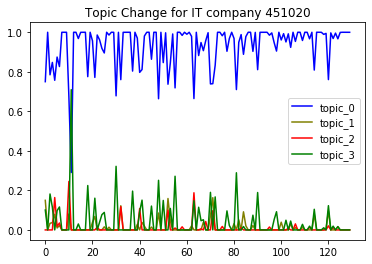

In [151]:
import matplotlib.pyplot as plt

plt.title('Topic Change for IT company 451020')
year = list(range(130))
plt.plot(list(range(130)), lda_topic_compo[0:130]['topic_0'],color='blue', label = 'topic_0')
plt.plot(year,lda_topic_compo[0:130]['topic_1'] ,color='olive', label = 'topic_1')
plt.plot(year, lda_topic_compo[0:130]['topic_2'],color='red', label = 'topic_2')
plt.plot(year,lda_topic_compo[0:130]['topic_3'] ,color='green', label = 'topic_3')

plt.legend()

In [144]:

with open('topic_change_4.pickle', 'wb') as handle:
    pickle.dump(lda_topic_compo, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [74]:
lda_topic_compo[22:33]

id   topic_0   topic_1   topic_2   topic_3
category year                                                       
finance  2010.0  7943.106643  0.049948  0.453358  0.324602  0.171131
         2011.0  7936.560420  0.051041  0.435159  0.347012  0.165810
         2012.0  7894.484140  0.048271  0.420814  0.361733  0.168380
         2013.0  7818.688027  0.048220  0.425575  0.351042  0.174340
         2014.0  7720.789137  0.046354  0.422162  0.343573  0.186893
         2015.0  7887.974763  0.049723  0.420730  0.339831  0.188761
         2016.0  7889.566007  0.054142  0.413023  0.336668  0.195275
         2017.0  7907.970248  0.055431  0.410588  0.338014  0.194868
         2018.0  7960.785235  0.057687  0.404777  0.332448  0.203948
         2019.0  7949.658579  0.058389  0.402072  0.334383  0.204172
         2020.0  7971.023009  0.059036  0.399594  0.333446  0.207009

In [67]:
year = list(range(2010, 2021))
year

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

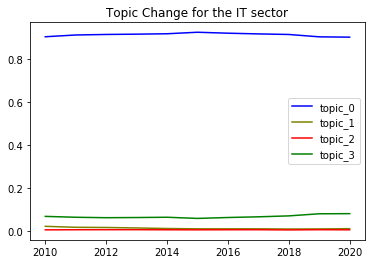

In [68]:
import matplotlib.pyplot as plt

plt.title('Topic Change for the IT sector')

plt.plot(year, lda_topic_compo[0:11]['topic_0'],color='blue', label = 'topic_0')
plt.plot(year,lda_topic_compo[0:11]['topic_1'] ,color='olive', label = 'topic_1')
plt.plot(year, lda_topic_compo[0:11]['topic_2'],color='red', label = 'topic_2')
plt.plot(year,lda_topic_compo[0:11]['topic_3'] ,color='green', label = 'topic_3')

plt.legend()

In [ ]:

plt.title('Topic Change for the IT sector')

plt.plot(year, lda_topic_compo[0:11]['topic_0'],color='blue', label = 'topic_0')
plt.plot(year,lda_topic_compo[0:11]['topic_1'] ,color='olive', label = 'topic_1')
plt.plot(year, lda_topic_compo[0:11]['topic_2'],color='red', label = 'topic_2')
plt.plot(year,lda_topic_compo[0:11]['topic_3'] ,color='green', label = 'topic_3')

plt.legend()

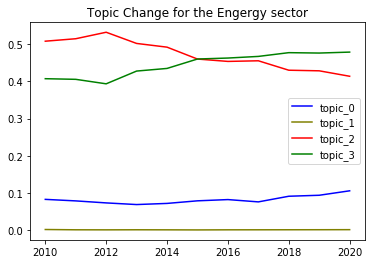

In [73]:

rows = lda_topic_compo[11:22]
plt.title('Topic Change for the Engergy sector')

plt.plot(year, rows['topic_0'],color='blue', label = 'topic_0')
plt.plot(year,rows['topic_1'] ,color='olive', label = 'topic_1')
plt.plot(year, rows['topic_2'],color='red', label = 'topic_2')
plt.plot(year,rows['topic_3'] ,color='green', label = 'topic_3')

plt.legend()

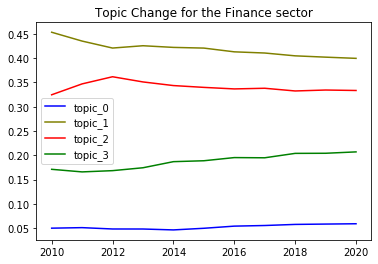

In [76]:
rows = lda_topic_compo[22:33]
plt.title('Topic Change for the Finance sector')

plt.plot(year, rows['topic_0'],color='blue', label = 'topic_0')
plt.plot(year,rows['topic_1'] ,color='olive', label = 'topic_1')
plt.plot(year, rows['topic_2'],color='red', label = 'topic_2')
plt.plot(year,rows['topic_3'] ,color='green', label = 'topic_3')

plt.legend()

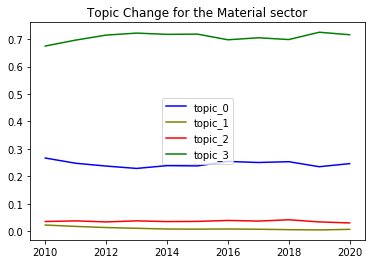

In [77]:
rows = lda_topic_compo[33:44]
plt.title('Topic Change for the Material sector')

plt.plot(year, rows['topic_0'],color='blue', label = 'topic_0')
plt.plot(year,rows['topic_1'] ,color='olive', label = 'topic_1')
plt.plot(year, rows['topic_2'],color='red', label = 'topic_2')
plt.plot(year,rows['topic_3'] ,color='green', label = 'topic_3')

plt.legend()